In [ ]:
# import library
import numpy as np  
from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt

# load data from keras
from tensorflow import keras
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [ ]:
# preprocessing the data

# encode the training label into onehot encoding
y_train=to_categorical(y_train)     
y_test=to_categorical(y_test)  

# convert 28x28 image to 784 array
x_train = X_train.reshape(60000, 28*28).astype('float32')  
x_test = X_test.reshape(10000, 28*28).astype('float32')  

# normalize the image numbers to 0~1
x_train = x_train/255
x_test = x_test/255 

In [ ]:
#build the model
model = Sequential()
model.add(Dense(units=66, input_dim=784, kernel_initializer='normal', activation='relu')) #add input layer hidden layer
model.add(Dense(units=10, kernel_initializer='normal', activation='softmax'))       #add output layer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])  #compile and choose lost function, optimizer and metrics 
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 66)                51810     
                                                                 
 dense_1 (Dense)             (None, 10)                670       
                                                                 
Total params: 52,480
Trainable params: 52,480
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
train_history = model.fit(x=x_train, y=y_train, validation_split=0.2, epochs=14, batch_size=64)  

Epoch 1/14
750/750 [==============================] - 5s 3ms/step - loss: 0.4487 - accuracy: 0.8829 - val_loss: 0.2462 - val_accuracy: 0.9301
Epoch 2/14
750/750 [==============================] - 2s 3ms/step - loss: 0.2179 - accuracy: 0.9375 - val_loss: 0.1816 - val_accuracy: 0.9497
Epoch 3/14
750/750 [==============================] - 2s 3ms/step - loss: 0.1666 - accuracy: 0.9521 - val_loss: 0.1524 - val_accuracy: 0.9563
Epoch 4/14
750/750 [==============================] - 2s 3ms/step - loss: 0.1352 - accuracy: 0.9605 - val_loss: 0.1383 - val_accuracy: 0.9589
Epoch 5/14
750/750 [==============================] - 2s 3ms/step - loss: 0.1136 - accuracy: 0.9666 - val_loss: 0.1230 - val_accuracy: 0.9638
Epoch 6/14
750/750 [==============================] - 2s 3ms/step - loss: 0.0955 - accuracy: 0.9725 - val_loss: 0.1164 - val_accuracy: 0.9663
Epoch 7/14
750/750 [==============================] - 2s 3ms/step - loss: 0.0823 - accuracy: 0.9762 - val_loss: 0.1090 - val_accuracy: 0.9680
Epoch 

In [ ]:
#plot function
from matplotlib import pyplot as plt

def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

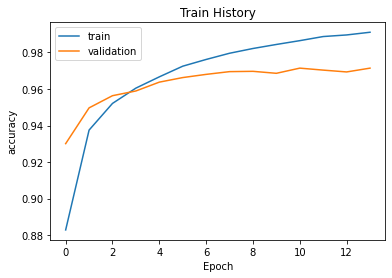

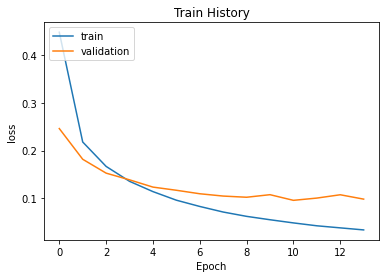

313/313 [==============================] - 1s 2ms/step - loss: 0.0938 - accuracy: 0.9725

accuracy= 0.9725000262260437


In [ ]:
#plot the 
show_train_history(train_history,'accuracy','val_accuracy')
show_train_history(train_history,'loss','val_loss')
scores = model.evaluate(x_test, y_test)
print()
print('accuracy=',scores[1])

In [ ]:
import os
os.chdir('/content/drive/MyDrive/AI/digits')  # Colab change path

from PIL import Image
img = Image.open('2.png').convert('L') #grayscale the picture
img = img.resize((28,28)) 
img

In [ ]:
im = np.array(img).astype('float32') 
im = (255-im)/255
im = im.reshape(784,1)
im = np.expand_dims(im, 0)

In [ ]:
np.argmax(model.predict(im))

1/1 [==============================] - 0s 14ms/step


2